In [38]:
import numpy as np
import healpy as hp
from DS_healpix_fragmentation import one_pixel_fragmentation, matr2dict
from matplotlib import pyplot as plt
from skimage.draw import circle

In [18]:
def get_neighb_pix(pix, nside):
    import healpy as hp
    theta, phi = hp.pix2ang(nest=True, nside=nside, ipix=pix)
    #right,down,up,left
    return hp.get_all_neighbours(nside, theta, phi, nest=True)[::2]

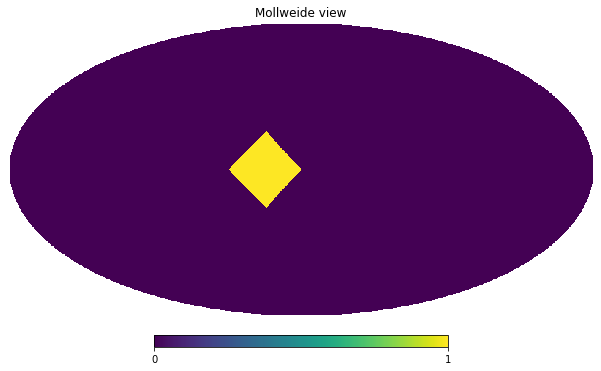

In [118]:
a = np.zeros(hp.nside2npix(2))
idx = np.unique(get_neighb_pix(19, 2))
idx = [idx[idx >= 0][2]]
a[idx] = np.arange(len(idx))+1
hp.mollview(a, nest=True)

In [112]:
idx

array([ 2, 13, 17, 18])

In [91]:
matr = one_pixel_fragmentation(2, 19, 10)

In [96]:
pic = np.zeros(matr.shape)
pic[:512,:512] = 1
pic[512:,:512] = 2
pic[:512,512:] = 3
pic[512:,512:] = 4

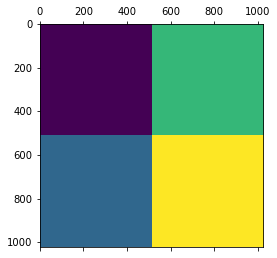

In [97]:
plt.matshow(pic)

In [98]:
a = np.zeros(hp.nside2npix(2048))
for i in range(matr.shape[0]):
    a[matr[i]] = pic[i]

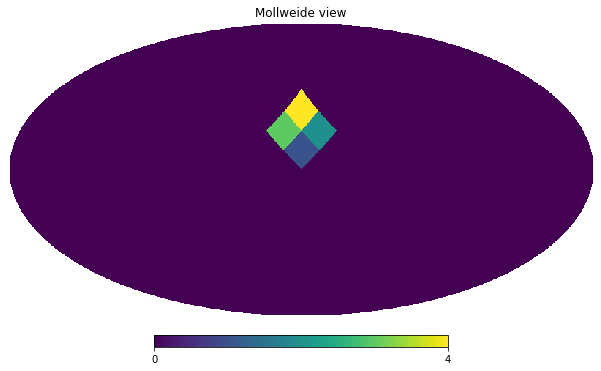

In [99]:
hp.mollview(a, nest=True)

In [100]:
test_pix = 19
n_pix = get_neighb_pix(test_pix, 2)
up_pix = n_pix[2]
left_pix = n_pix[3]
right_pix = n_pix[0]
down_pix = n_pix[1]

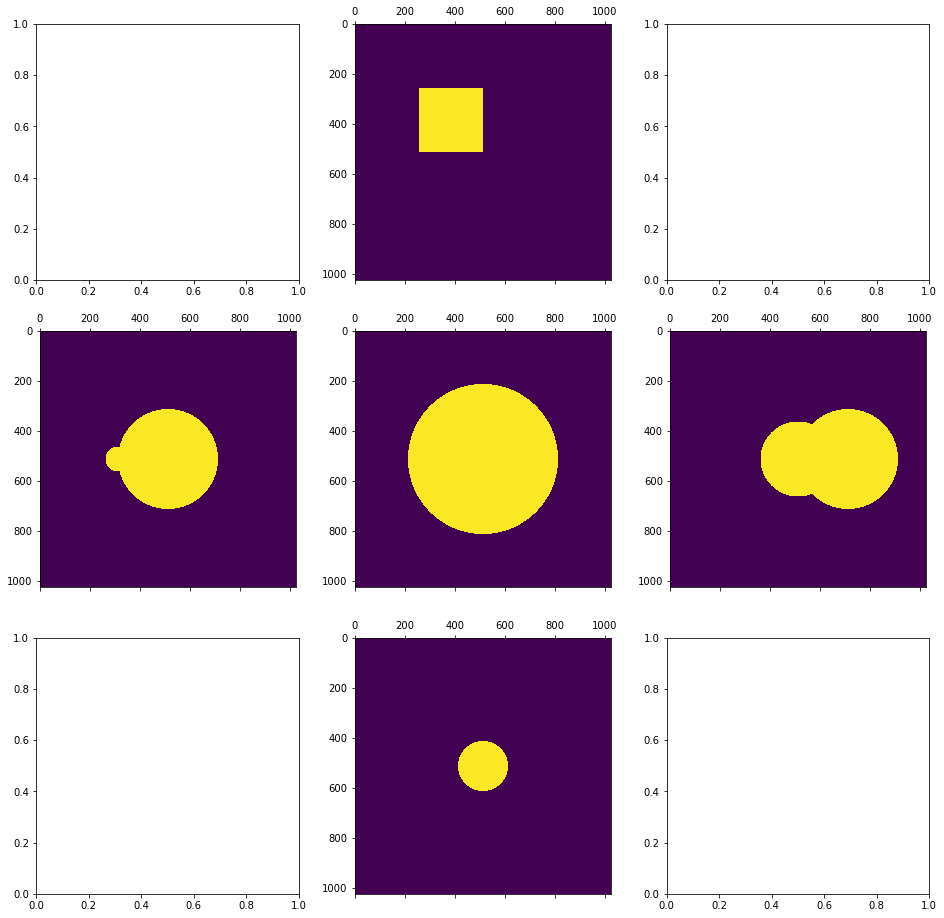

In [106]:
center_pic = np.zeros(matr.shape)
center_pic[circle(512, 512, 300, shape=matr.shape)]=1
up_pic = np.zeros(matr.shape)
#up_pic[circle(512, 512, 250, shape=matr.shape)]=1
up_pic[256:512,256:512]=1
left_pic = np.zeros(matr.shape)
left_pic[circle(512, 512, 200, shape=matr.shape)]=1
left_pic[circle(512, 312, 50, shape=matr.shape)]=1
right_pic = np.zeros(matr.shape)
right_pic[circle(512, 512, 150, shape=matr.shape)]=1
right_pic[circle(512, 712, 200, shape=matr.shape)]=1
down_pic = np.zeros(matr.shape)
down_pic[circle(512, 512, 100, shape=matr.shape)]=1
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax[0, 1].matshow(up_pic)
ax[1, 0].matshow(left_pic)
ax[1, 1].matshow(center_pic)
ax[1, 2].matshow(right_pic)
ax[2, 1].matshow(down_pic)

In [107]:
def draw_pic_map(map_arr, pix, pic):
    matr = one_pixel_fragmentation(2, pix, 10)
    for i in range(matr.shape[0]):
        map_arr[matr[i]] = pic[i]

In [108]:
a = np.zeros(hp.nside2npix(2048))

In [109]:
draw_pic_map(a, test_pix, center_pic)
draw_pic_map(a, up_pix, up_pic)
draw_pic_map(a, left_pix, left_pic)
draw_pic_map(a, right_pix, right_pic)
draw_pic_map(a, down_pix, down_pic)

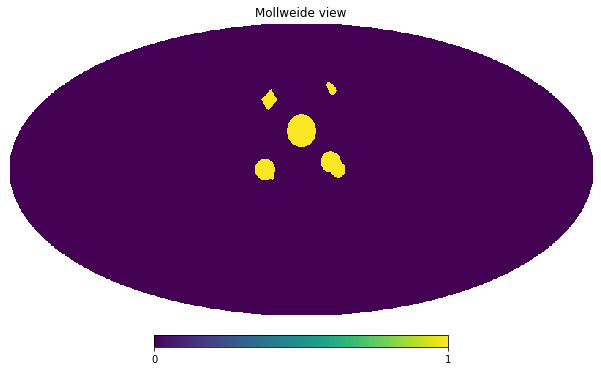

In [110]:
hp.mollview(a, nest=True)